# Когортный анализ
## Анализ динамики удержания клиентов


Анализ динамики удержания клиентов будет проводиться с помощью когоротного анализа.



---


### Что и для чего это?

Это анализ, который разделяет клиентов по дате их первой покупки (транзакции) и позволяет отследить, остаются ли они покупатели в последующие месяцы. Это помогает проверить:

1. Коэффициент удержания (Retention Rate).

2. Динамику коэффициента удержания.


**Когорта** в данном случае - это группа покупателей, пришедших в один месяц.


---

### Откуда данные?

Данные в csv формате по онлайн-спермаркету Великобритании из открытого источника, [репозитория UCI](https://https://archive.ics.uci.edu/ml/datasets/online+retail). Взяты данные за 12 месяцев.


---

### Что в таблице?

Данные о покупках в супермаркете за последние 12 месяцев. 68176 строк (1 строка = 1 чек).

Что в колонках?

* ID покупателя (CustomerID)

* Страна (Country)

* Описание купленного товара (Description)

* Количество (Quantity)

* Код продукта (StockCode)

* Номер счета-фактуры (InvoiceNo)

* Цена за одну единицу (UnitPrice)



---

### Этапы работы

1. Подготовка. Импорт библиотек, обзор данных, чистка, если понадобится.

2. Создание когортной матрицы.
Работа с датами, группировкой, агрегацией и трансформацией.

3. Подсчет коэффициента удержания.

4. Визуализация.
Работа с heatmaps.

5. Извлечение инсайтов.


## Главные выводы


Можно увидеть тренд: с каждым месяцем показатель удержания падает. Из тех, кто пришел в декабре 2010, около 40% осталось и в каждый следующий месяц (исключая последний 13ый месяц). Но потом эта средняя цифра падает. Для второй когорты это уже 30%. для третьей - 25%. Для четвертой - 20%. И из самой новой когорты лишь 10% снова прибрели что-то во второй месяц. Это требует дополнительного анализа, какие обстоятельства на это повлияли - ухудшение качества товаров или обслуживания, изменение маркетинговой политики и рекламных компаний, макроэкономическая ситуация и т.п..

## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [ ]:
df = pd.read_csv('online12M.csv', parse_dates=['InvoiceDate'])
df = df.drop('Unnamed: 0', axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom


In [ ]:
#Проверка дубликатов

df[df.duplicated(keep=False)].sort_values(by=['InvoiceNo', 'InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17376,538312,22738,RIBBON REEL SNOWY VILLAGE,5,2010-12-10,1.65,16727,United Kingdom
26819,538312,22738,RIBBON REEL SNOWY VILLAGE,5,2010-12-10,1.65,16727,United Kingdom
37207,538419,21380,WOODEN HAPPY BIRTHDAY GARLAND,1,2010-12-12,2.95,16367,United Kingdom
61950,538419,21380,WOODEN HAPPY BIRTHDAY GARLAND,1,2010-12-12,2.95,16367,United Kingdom
9972,538510,22812,PACK 3 BOXES CHRISTMAS PANNETONE,1,2010-12-12,1.95,18004,United Kingdom
...,...,...,...,...,...,...,...,...
67136,581134,21592,RETROSPOT CIGAR BOX MATCHES,1,2011-12-07,0.39,16368,United Kingdom
2651,581147,23332,IVORY WICKER HEART LARGE,5,2011-12-07,1.65,16426,United Kingdom
65286,581147,23332,IVORY WICKER HEART LARGE,5,2011-12-07,1.65,16426,United Kingdom
34620,581414,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2011-12-08,2.95,14730,United Kingdom


In [ ]:
df = df.drop_duplicates()
df[df.duplicated(keep=False)].sort_values(by=['InvoiceNo', 'InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#типы данных по каждой колонке
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67952 entries, 0 to 68175
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    67952 non-null  int64         
 1   StockCode    67952 non-null  object        
 2   Description  67952 non-null  object        
 3   Quantity     67952 non-null  int64         
 4   InvoiceDate  67952 non-null  datetime64[ns]
 5   UnitPrice    67952 non-null  float64       
 6   CustomerID   67952 non-null  int64         
 7   Country      67952 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.7+ MB


Все колонки имеют адекватный тип данных.

In [ ]:
#Проверить размах по времени

print("Самая ранняя дата: ", df['InvoiceDate'].min())
print("Самая поздняя дата: ",df['InvoiceDate'].max())

Самая ранняя дата:  2010-12-10 00:00:00
Самая поздняя дата:  2011-12-09 00:00:00


## Высчитывание нужных колонок для таблицы

In [ ]:
#нам важно определиить месяц покупки
df['YearMonth'] = pd.to_datetime(df['InvoiceDate'].dt.strftime('%Y-%m'))


#найдем самый ранний месяц для каждого покупателя
#это станет месяцем, определяющим его когорту
df['CohortMonth'] = pd.to_datetime(df.groupby('CustomerID')['YearMonth'].transform('min'))

#для каждой покупки нужно посчитать, сколько прошло месяцев с момента самой ранней покупки
year_dif = 12*(df['InvoiceDate'].dt.year - df['CohortMonth'].dt.year)
month_dif = df['InvoiceDate'].dt.month - df['CohortMonth'].dt.month
df['CohortIndex'] = year_dif + month_dif + 1  #добавляем 1, чтобы индекс первой когорты был 1, а не 0



df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


## Создание когортной матрицы

In [ ]:
cohorts = pd.pivot_table(index='CohortMonth', columns='CohortIndex', values= 'CustomerID', data=df,
                         aggfunc= pd.Series.nunique)

# колонка - порядковый номер месяца совершения покупок,
# индекс - месяц первой покупки,
# клетки - количество уникальных покупатлей.
cohorts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,383.0,149.0,145.0,156.0,165.0,180.0,160.0,147.0,154.0,160.0,150.0,208.0,113.0
2011-01-01,429.0,109.0,134.0,123.0,161.0,139.0,126.0,130.0,160.0,146.0,180.0,77.0,NaN
2011-02-01,352.0,67.0,67.0,94.0,97.0,85.0,91.0,98.0,100.0,113.0,36.0,NaN,NaN
2011-03-01,422.0,67.0,113.0,88.0,91.0,74.0,113.0,94.0,122.0,44.0,NaN,NaN,NaN
2011-04-01,279.0,61.0,60.0,59.0,58.0,59.0,67.0,70.0,18.0,NaN,NaN,NaN,NaN
2011-05-01,267.0,41.0,47.0,41.0,55.0,62.0,68.0,25.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,214.0,33.0,27.0,43.0,49.0,64.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,185.0,29.0,33.0,42.0,47.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,145.0,30.0,30.0,36.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Как это понимать?

* В первой колонке показано, сколько уникальных покупателей пришло в месяце, указанном в индексе.

In [ ]:
#Если сложить данные в первой колонке получится общее число уникальных покупателей.

sum(cohorts[1]) == df['CustomerID'].nunique()

True

* Во второй колонке каждой строчки показано, сколько осталось покупателей из тех, кто был в прошлом месяце. Не новых, а именно сохранившихся после прошлого месяца.

* В третьей колонке - сколько осталось на третий месяц.

И так далее.

* Пустые значения колонок (NaN ) говорят о том, что для этой когорты прошлый заполненный месяц был их первым месяцем.

## Коэффициент удержания

In [ ]:
#Посчитаем оставшихся покупателей после каждого месяца в процентах

retentions = cohorts.divide(cohorts[1], axis=0) * 100
retentions = retentions.round(2)
retentions

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.90,37.86,40.73,43.08,47.00,41.78,38.38,40.21,41.78,39.16,54.31,29.5
2011-01-01,100.0,25.41,31.24,28.67,37.53,32.40,29.37,30.30,37.30,34.03,41.96,17.95,NaN
2011-02-01,100.0,19.03,19.03,26.70,27.56,24.15,25.85,27.84,28.41,32.10,10.23,NaN,NaN
2011-03-01,100.0,15.88,26.78,20.85,21.56,17.54,26.78,22.27,28.91,10.43,NaN,NaN,NaN
2011-04-01,100.0,21.86,21.51,21.15,20.79,21.15,24.01,25.09,6.45,NaN,NaN,NaN,NaN
2011-05-01,100.0,15.36,17.60,15.36,20.60,23.22,25.47,9.36,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.42,12.62,20.09,22.90,29.91,8.88,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,15.68,17.84,22.70,25.41,10.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.69,20.69,24.83,10.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Визуализация

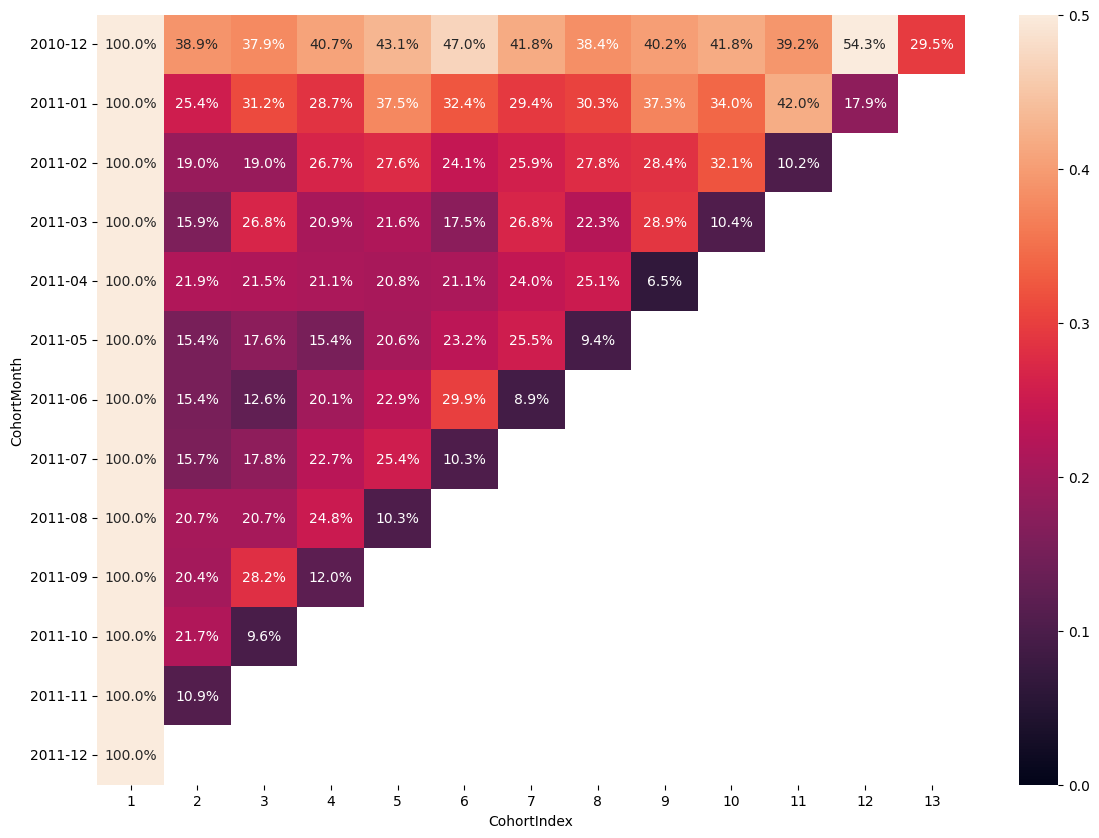

In [ ]:
plt.figure(figsize= (14,10))
ax = sns.heatmap(cohorts.divide(cohorts[1], axis=0), annot=True,
            fmt='0.1%',
            vmin=0.0,
            vmax=0.5,
            )
ax.set_yticklabels(cohorts.index.strftime('%Y-%m'))
plt.show()

## Интерпретация и выводы

* Теперь мы видим процент "удержавшихся" покупателей по каждой когорте.

* Можно увидеть тренд: с каждым месяцем показатель удержания падает. Из тех, кто пришел в декабре 2010, около 40% осталось и в каждый следующий месяц (исключая последний 13ый месяц). Но потом эта средняя цифра падает. Для второй когорты это уже 30. для третьей - 25%. Для четвертой - 20%. И из самой новой когорты лишь 10% снова приобрели что-то во второй месяц.

* Это требует дополнительного анализа, какие обстоятельства на это повлияли - ухудшение качества товаров или обслуживания, изменение маркетинговой политики и рекламных компаний, макроэкономическая ситуация и т.п..